In [11]:
import scanpy as sc
import seaborn as sns
import matplotlib.gridspec as gridspec
import matplotlib.pyplot as plt

In [12]:
path = '../'
covid_rna = sc.read_h5ad(f'{path}/0_preprocess/data/harmony/covid_all/0_harmonyPCA.h5ad')
out_dir = f"{path}/2_TFactivity/activity_out/"
tf_act_raw = sc.read_h5ad(f'{out_dir}/covid19_tfactivity.h5ad')
sc.pp.scale(tf_act_raw)

In [13]:
sc.set_figure_params(figsize=(6, 6), frameon=False)
sns.set_theme()
%config InlineBackend.print_figure_kwargs={"facecolor": "w"}
%config InlineBackend.figure_format="retina"

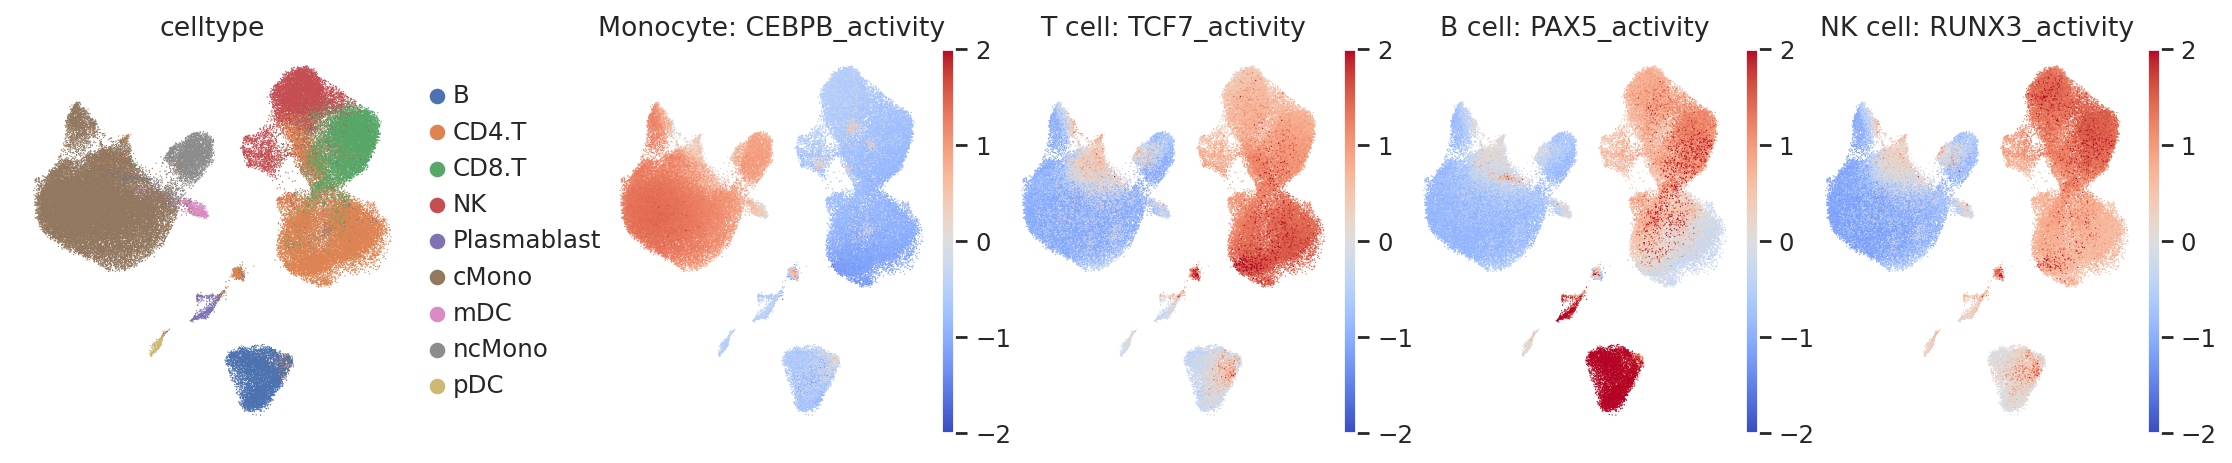

In [14]:
covid_rna.obs['celltypeL0'] = covid_rna.obs['celltypeL0'].replace(
    {'CD163.cMono': 'cMono'}
)
ad = tf_act_raw[:,tf_act_raw.var['motif_name']=='RUNX3']
covid_rna.obs['RUNX3_activity'] = ad.X.flatten()  
ad = tf_act_raw[:,tf_act_raw.var['motif_name']=='TCF7']
covid_rna.obs['TCF7_activity'] = ad.X.flatten()  
ad = tf_act_raw[:,tf_act_raw.var['motif_name']=='CEBPB']
covid_rna.obs['CEBPB_activity'] = ad.X.flatten()  
ad = tf_act_raw[:,tf_act_raw.var['motif_name']=='PAX5']
covid_rna.obs['PAX5_activity'] = ad.X.flatten()  


fig = plt.figure(figsize=(15, 3))
gs = gridspec.GridSpec(1, 2, width_ratios=[1, 4], wspace=0.2)
ax0 = fig.add_subplot(gs[0,0])
sc.pl.umap(covid_rna, color='celltypeL0', ax=ax0, show=False)
ax0.set_title('celltype')

gs_right = gridspec.GridSpecFromSubplotSpec(1, 4, subplot_spec=gs[0,1], wspace=0.1)
ax1 = fig.add_subplot(gs_right[0,0])
ax2 = fig.add_subplot(gs_right[0,1])
ax3 = fig.add_subplot(gs_right[0,2])
ax4 = fig.add_subplot(gs_right[0,3])

sc.pl.umap(covid_rna, color='CEBPB_activity', ax=ax1, cmap='coolwarm', vmin=-2, vmax=2, show=False)
sc.pl.umap(covid_rna, color='TCF7_activity', ax=ax2, cmap='coolwarm', vmin=-2, vmax=2,show=False)
sc.pl.umap(covid_rna, color='PAX5_activity', ax=ax3, cmap='coolwarm', vmin=-2, vmax=2,show=False)
sc.pl.umap(covid_rna, color='RUNX3_activity', ax=ax4, cmap='coolwarm', vmin=-2, vmax=2,show=False)
ax1.set_title('Monocyte: CEBPB_activity')
ax2.set_title('T cell: TCF7_activity')
ax3.set_title('B cell: PAX5_activity')
ax4.set_title('NK cell: RUNX3_activity')
plt.subplots_adjust(left=0.05, right=0.95, top=0.9, bottom=0.1)
# plt.savefig(f"{out_dir}/cellmarker_activityZ.pdf", format="pdf", bbox_inches="tight", dpi=300)